# Proyecto 3 - Clustering
## Parte 2.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from collections import defaultdict
from sklearn.decomposition import PCA
from clustering import Kmeans_cluster
from IPython.display import clear_output

### Parte 2.1.1
#### Cargar, limpiar y transformar los datos

In [2]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 

# data (como DataFrame)
X = iris.data.features 
y = iris.data.targets

# Limpiar datos
# Convierte las etiquetas reales a valores numéricos
y_numeric = pd.factorize(y['class'])[0]

X = X.dropna() 												# Eliminar filas con valores NaN en X
y = y.dropna() 												# Eliminar filas con valores NaN en y
X_norm = ((X - X.min()) / (X.max() - X.min())) * 9 + 1		# Normalizar X entre 1 y 10
X_norm

,sepal length,sepal width,petal length,petal width
0,3.00,6.625,1.610169,1.375
1,2.50,4.750,1.610169,1.375
2,2.00,5.500,1.457627,1.375
3,1.75,5.125,1.762712,1.375
4,2.75,7.000,1.610169,1.375
...,...,...,...,...
145,7.00,4.750,7.406780,9.250
146,6.00,2.875,7.101695,7.750
147,6.50,4.750,7.406780,8.125
148,5.75,6.250,7.711864,9.250


#### Graficar los datos etiquetados originales

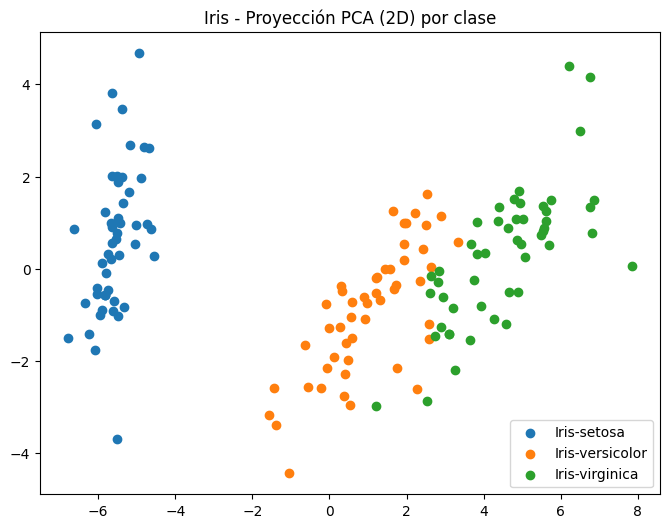

In [3]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

plt.figure(figsize=(8, 6))
for label in y['class'].unique():
	idx = y['class'] == label
	plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=label)
plt.title('Iris - Proyección PCA (2D) por clase')
plt.legend()
plt.show()

#### Aplicar clustering para distintos valores de $k$

---------------------------------------- Clustering con k=2 ----------------------------------------
********** Run 1/5 **********
>>> Inertia = 983.638751 | Accuracy = 0.666667
********** Run 2/5 **********
>>> Inertia = 983.638751 | Accuracy = 0.666667
********** Run 3/5 **********
>>> Inertia = 983.638751 | Accuracy = 0.666667
********** Run 4/5 **********
>>> Inertia = 983.638751 | Accuracy = 0.666667
********** Run 5/5 **********
>>> Inertia = 983.638751 | Accuracy = 0.666667

******************************
>>> Average inertia: 983.638751
>>> Best (min) inertia: 983.638751
>>> Worst (max) inertia: 983.638751
>>> Average accuracy: 0.666667


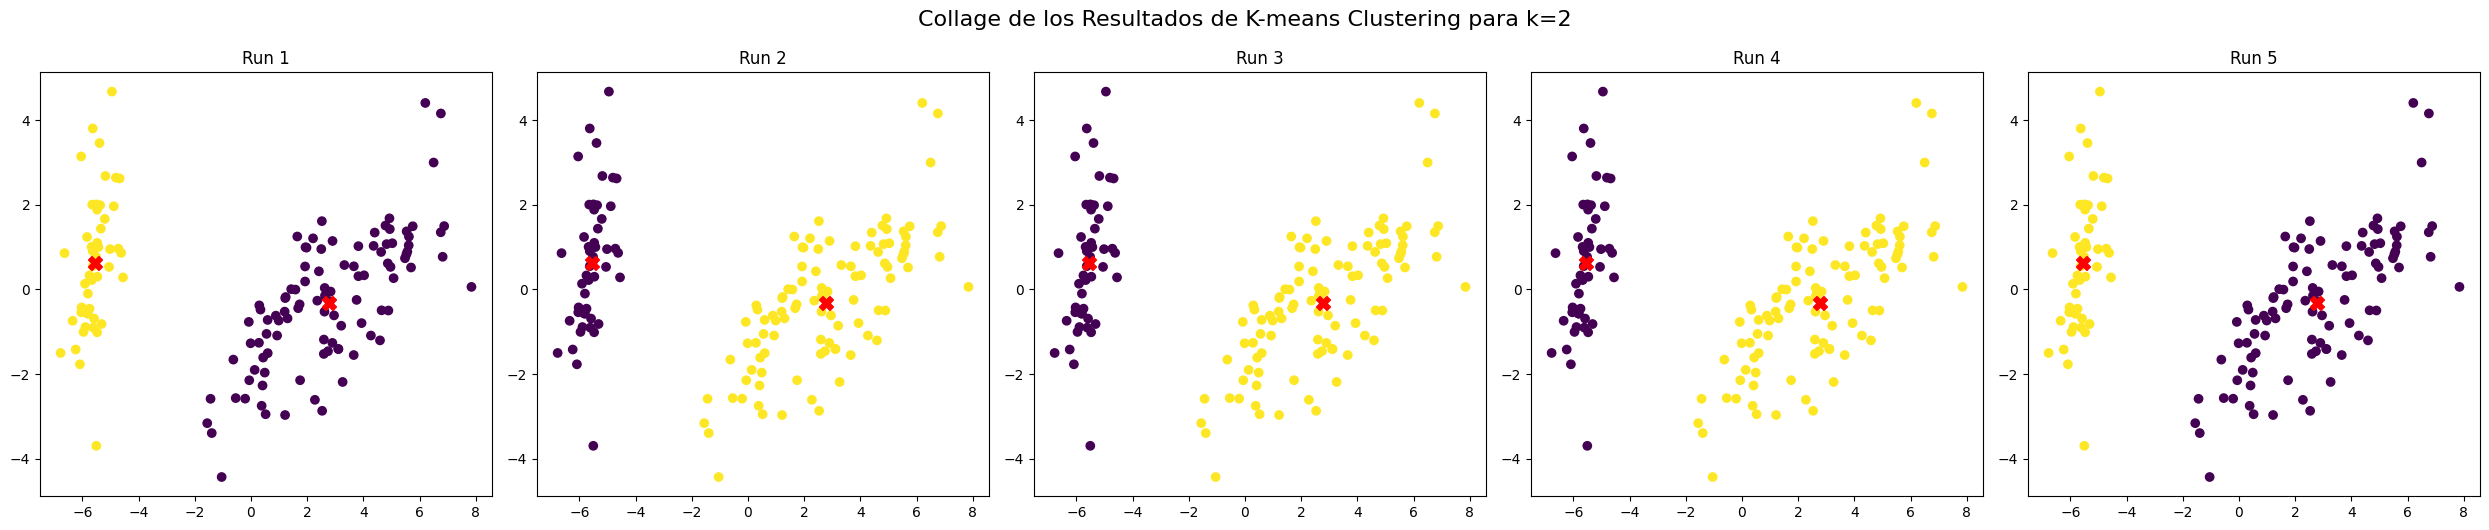

---------------------------------------- Clustering con k=3 ----------------------------------------
********** Run 1/5 **********
>>> Inertia = 566.847234 | Accuracy = 0.886667
********** Run 2/5 **********
>>> Inertia = 578.230464 | Accuracy = 0.880000
********** Run 3/5 **********
>>> Inertia = 566.847234 | Accuracy = 0.886667
********** Run 4/5 **********
>>> Inertia = 578.230464 | Accuracy = 0.880000
********** Run 5/5 **********
>>> Inertia = 578.230464 | Accuracy = 0.880000

******************************
>>> Average inertia: 573.677172
>>> Best (min) inertia: 566.847234
>>> Worst (max) inertia: 578.230464
>>> Average accuracy: 0.882667


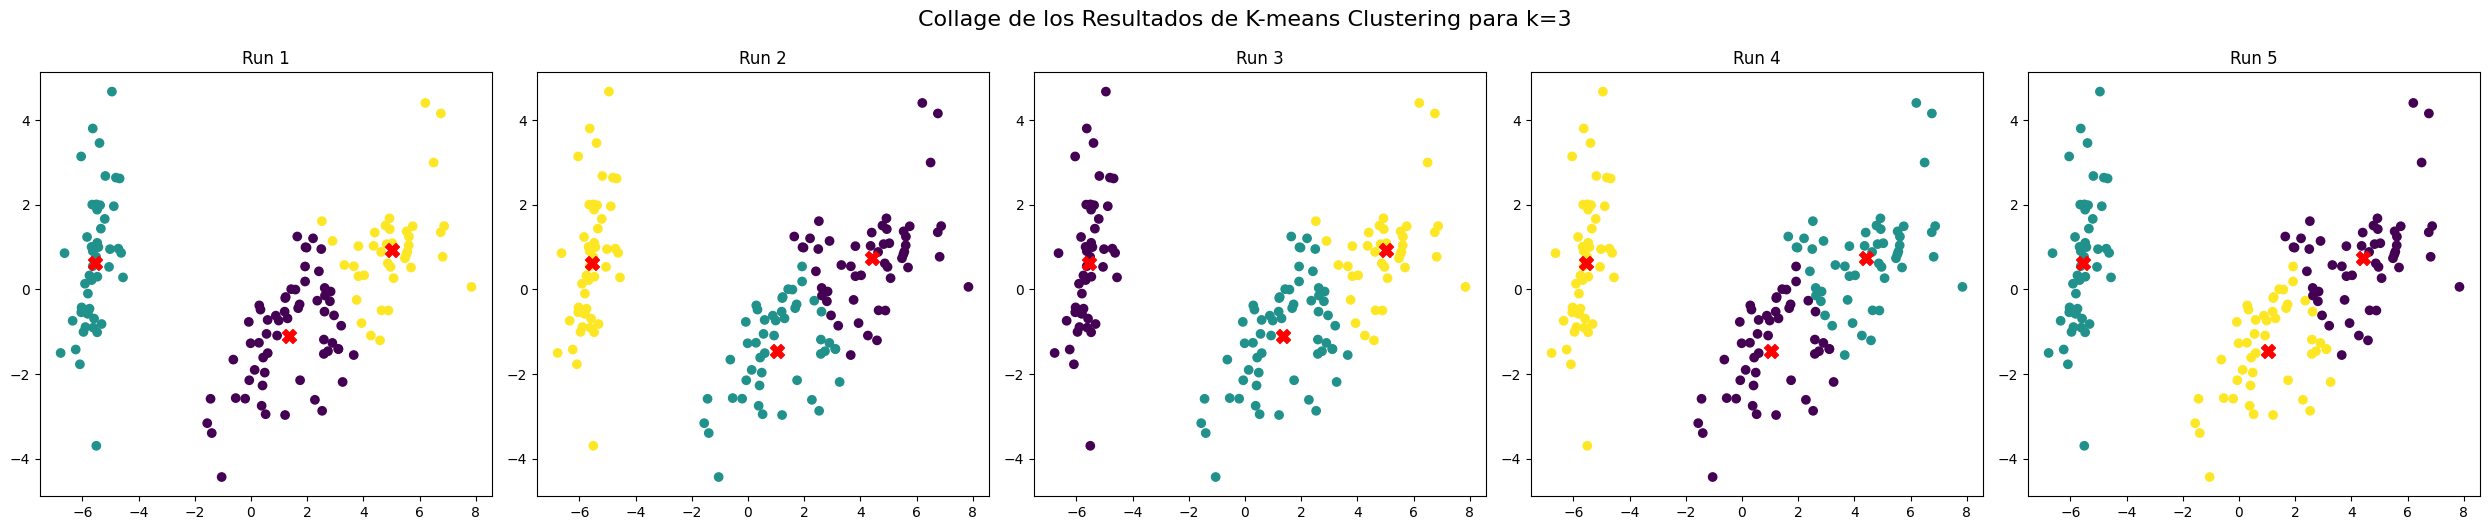

---------------------------------------- Clustering con k=4 ----------------------------------------
********** Run 1/5 **********
>>> Inertia = 449.530493 | Accuracy = 0.866667
********** Run 2/5 **********
>>> Inertia = 578.230464 | Accuracy = 0.880000
********** Run 3/5 **********
>>> Inertia = 883.570274 | Accuracy = 0.666667
********** Run 4/5 **********
>>> Inertia = 449.530493 | Accuracy = 0.866667
********** Run 5/5 **********
>>> Inertia = 883.570274 | Accuracy = 0.666667

******************************
>>> Average inertia: 648.886400
>>> Best (min) inertia: 449.530493
>>> Worst (max) inertia: 883.570274
>>> Average accuracy: 0.789333


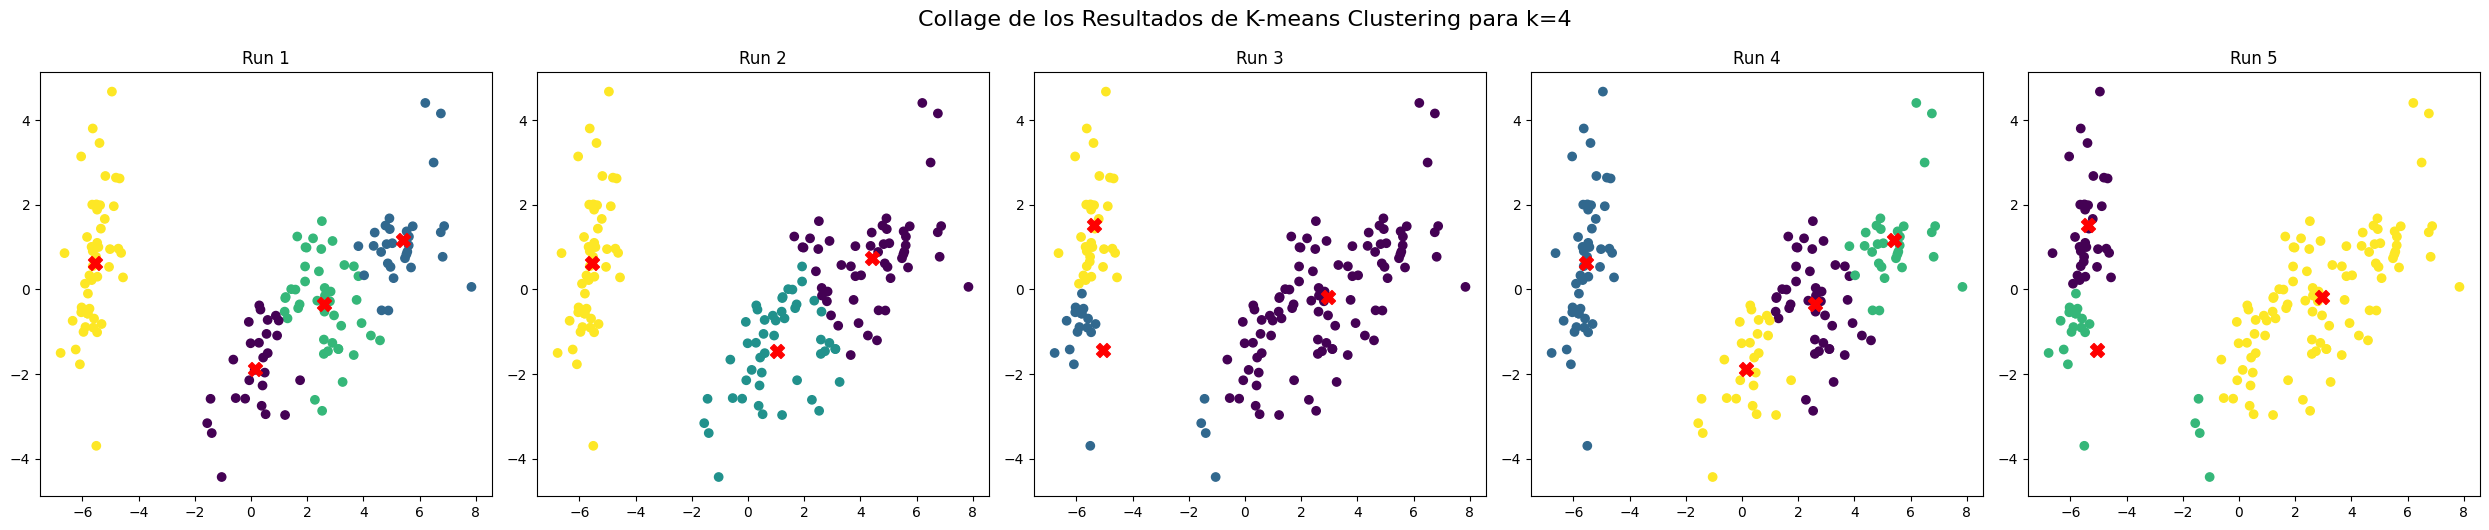

---------------------------------------- Clustering con k=5 ----------------------------------------
********** Run 1/5 **********
>>> Inertia = 491.495276 | Accuracy = 0.886667
********** Run 2/5 **********
>>> Inertia = 449.530493 | Accuracy = 0.866667
********** Run 3/5 **********
>>> Inertia = 448.159311 | Accuracy = 0.860000
********** Run 4/5 **********
>>> Inertia = 578.230464 | Accuracy = 0.880000
********** Run 5/5 **********
>>> Inertia = 449.530493 | Accuracy = 0.866667

******************************
>>> Average inertia: 483.389207
>>> Best (min) inertia: 448.159311
>>> Worst (max) inertia: 578.230464
>>> Average accuracy: 0.872000


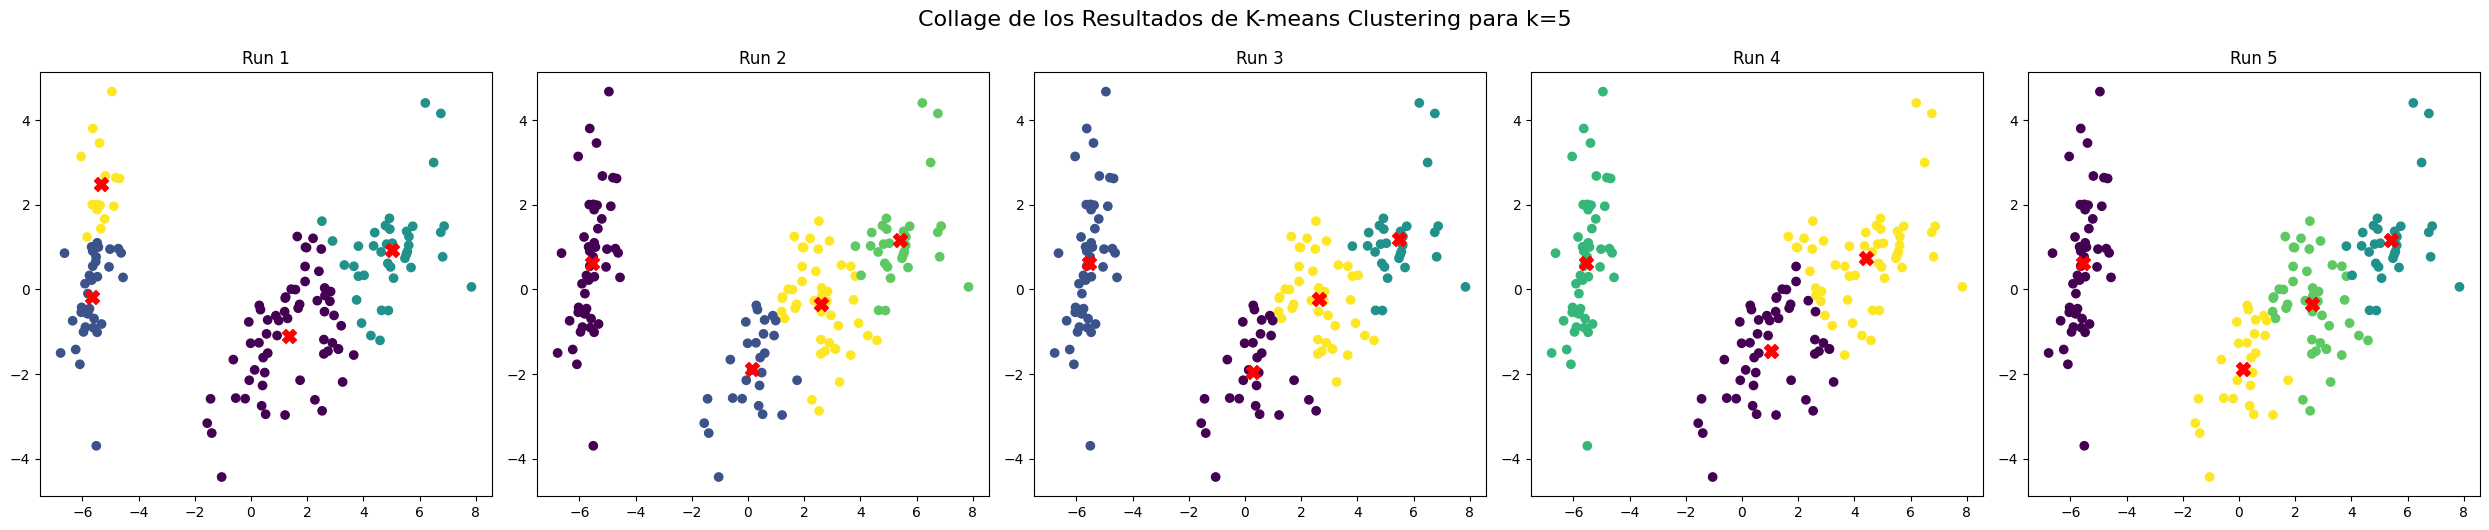

In [3]:
k_values = [2,3,4,5]
inertias_per_k = defaultdict(list)
for k in k_values:
	print("-"*40, f"Clustering con k={k}", "-"*40)
	kmeans_cluster = Kmeans_cluster(n_clusters=k)
	inertias = kmeans_cluster.multiple_runs(
		X_norm,									# Datos normalizados
		y_numeric,								# Etiquetas reales (convertidas a numéricas)
		clear_output,							# Función para limpiar la salida
		collage_name=f'iris_kmeans_k={k}.png' 	# Nombre del collage de resultados (Eliminar si no se quiere guardar el collage)
	)
	inertias_per_k[k].extend(inertias)  # Guardar las inercia de cada k
	

#### Graficar los resultados de clustering (elbow)

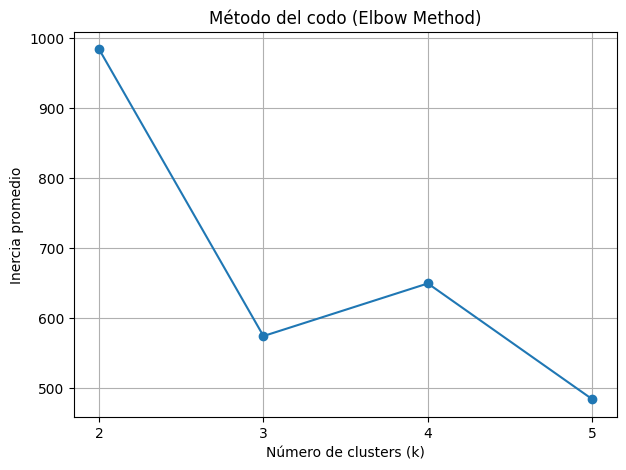

In [4]:
# Calcular la inercia promedio para cada valor de k
mean_inertias = [np.mean(inertias_per_k[k]) for k in k_values]

plt.figure(figsize=(7, 5))
plt.plot(k_values, mean_inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia promedio')
plt.title('Método del codo (Elbow Method)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Parte 2.1.2
#### Calcular nivel de precision del clustering

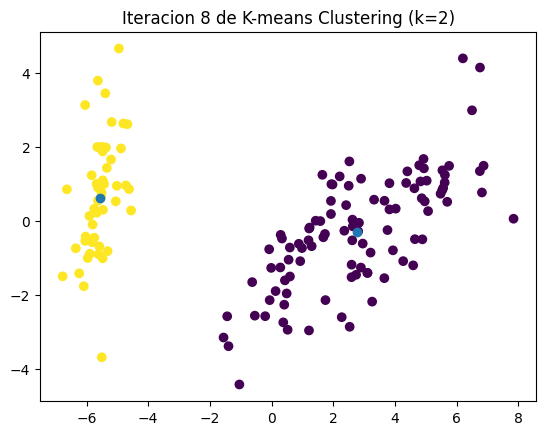

Cluster accuracy: 0.6666666666666666


In [5]:
# para k = 2
kmeans_2 = Kmeans_cluster(n_clusters=2)
kmeans_2.kmeans_algorithm(
	X_norm,
	clear_output,
	animation=True
# 	savefig_name='kmeans_k2.png' 	# Nombre del collage de resultados (Eliminar si no se quiere guardar el collage)
)

acc = kmeans_2.cluster_accuracy(y_numeric)
print("Cluster accuracy:", acc)

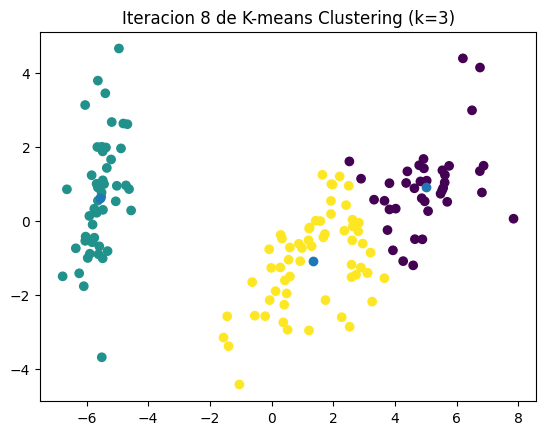

Cluster accuracy: 0.8866666666666667


In [6]:
# para k = 3
kmeans_3 = Kmeans_cluster(n_clusters=3)
kmeans_3.kmeans_algorithm(
	X_norm,
	clear_output, 
	animation=True
# 	savefig_name='kmeans_k3.png' 	# Nombre del collage de resultados (Eliminar si no se quiere guardar el collage)
)

acc = kmeans_3.cluster_accuracy(y_numeric)
print("Cluster accuracy:", acc)